# Predicting Employee Attrition
This project will seek to study employee data with an eye to determining whether we may predict employee attrition from employee characteristics.  The data utilized is for study purposes only:  the initial set of data was fabricated by IBM for the purposes of providing data for understanding and practicing data science tools & techniques.  To this I supplemented actual psychometric data that come from online personality tests.  For the purposes of the project, I imagined that the psychometric exams were administered to the employees.  In such a fabricated scenario it is unrealistic to suggest that any "TRUE" insights may be derived but nonethless, will provide sufficiently complex data for a machine learning study.   

### Obtaining & Cleaning Data:
Importing relevant packages:

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Reading csv's into a dataframe:

In [2]:
df_big_five = pd.read_csv("data/BIG5/Big5_employee_results.csv")

In [3]:
df_big_five.head()

,EmployeeNumber,hand,Openness,Conscieniousness,Extroversion,Agreeableness,Neuroticism,E1(1),E2(-1),E3(1),...,O1(1),O2(-1),O3(1),O4(-1),O5(1),O6(-1),O7(1),O8(1),O9(1),O10(1)
0,1,1,NaN,NaN,NaN,NaN,NaN,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,2,1,NaN,NaN,NaN,NaN,NaN,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,4,1,NaN,NaN,NaN,NaN,NaN,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,5,1,NaN,NaN,NaN,NaN,NaN,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,7,1,NaN,NaN,NaN,NaN,NaN,3,1,3,...,3,1,1,1,3,1,3,1,5,3


###  Preparing for Scoring answers:
The values for Columns E1(1) through O10(1) are respondents answers to the questions of the Big Five personality psychometric test.  Some of those columns (for example,  O6(-1)), have values that are to be scored negatively.  For those columns, the array of values was multiplied by -1.

In [4]:
# change values for columns E2(-1), E4(-1), E6(-1), E8(-1), E10(-1), N1(-1), N3(-1), N5(-1), N6(-1), N7(-1), N8(-1)
# N9(-1), N10(-1), A1(-1), A3(-1), A5(-1), A7(-1), C2(-1), C4(-1), C6(-1), C8(-1),O2(-1),O4(-1),O6(-1)
df_big_five["C8(-1)"] = -1 * df_big_five["C8(-1)"]
df_big_five["C8(-1)"]

0      -1
1      -1
2      -1
3      -4
4      -3
       ..
1465   -3
1466   -4
1467   -1
1468   -4
1469   -3
Name: C8(-1), Length: 1470, dtype: int64

In [5]:
df_big_five.head()

,EmployeeNumber,hand,Openness,Conscieniousness,Extroversion,Agreeableness,Neuroticism,E1(1),E2(-1),E3(1),...,O1(1),O2(-1),O3(1),O4(-1),O5(1),O6(-1),O7(1),O8(1),O9(1),O10(1)
0,1,1,NaN,NaN,NaN,NaN,NaN,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,2,1,NaN,NaN,NaN,NaN,NaN,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,4,1,NaN,NaN,NaN,NaN,NaN,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,5,1,NaN,NaN,NaN,NaN,NaN,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,7,1,NaN,NaN,NaN,NaN,NaN,3,1,3,...,3,1,1,1,3,1,3,1,5,3


### Changing column names:

In [6]:
# changing 'Neuroticism' 'Emotional Balance';  removing parenthesis from column names
df_big_five = df_big_five.rename(columns=
                                 {'Neuroticism' : 'Emotional Balance', 'E1(1)' : 'E1',  'E2(-1)': 'E2', 'E3(1)' : 'E3','E4(-1)': 'E4', 'E5(1)': 'E5',
 'E6(-1)' : 'E6', 'E7(1)' : 'E7', 'E8(-1)' : 'E8', 'E9(1)' : 'E9', 'E10(-1)' : 'E10', 'N1(-1)' : 'N1', 'N2(1)' : 'N2',
 'N3(-1)' : 'N3', 'N4(1)' : 'N4','N5(-1)' : 'N5', 'N6(-1)' : 'N6', 'N7(-1)' : 'N7', 'N8(-1)' : 'N8', 'N9(-1)' : 'N9', 
 'N10(-1)' : 'N10', 'A1(-1)' : 'A1', 'A2(1)' : 'A2', 'A3(-1)': 'A3','A4(1)' : 'A4', 'A5(-1)' : 'A5', 'A6(1)' : 'A6',
 'A7(-1)' : 'A7', 'A8(1)' : 'A8', 'A9(1)' : 'A9', 'A10(1)' : 'A10', 'C1(1)' : 'C1', 'C2(-1)' : 'C2', 'C3(1)' : 'C3', 
 'C4(-1)' : 'C4', 'C5(1)' : 'C5', 'C6(-1)' : 'C6', 'C7(1)': 'C7', 'C8(-1)' : 'C8', 'C9(1)' : 'C9', 
 'C10(1)' : 'C10', 'O1(1)' : 'O1', 'O2(-1)' : 'O2', 'O3(1)' : 'O3', 'O4(-1)' : 'O4', 
 'O5(1)' : 'O5', 'O6(-1)' : 'O6', 'O7(1)' : 'O7', 'O8(1)' : 'O8', 'O9(1)' : 'O9', 'O10(1)' : 'O10'})

In [7]:
df_big_five.head()

,EmployeeNumber,hand,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,1,NaN,NaN,NaN,NaN,NaN,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,2,1,NaN,NaN,NaN,NaN,NaN,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,4,1,NaN,NaN,NaN,NaN,NaN,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,5,1,NaN,NaN,NaN,NaN,NaN,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,7,1,NaN,NaN,NaN,NaN,NaN,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [8]:
df_big_five.isna().sum()

EmployeeNumber          0
hand                    0
Openness             1470
Conscieniousness     1470
Extroversion         1470
Agreeableness        1470
Emotional Balance    1470
E1                      0
E2                      0
E3                      0
E4                      0
E5                      0
E6                      0
E7                      0
E8                      0
E9                      0
E10                     0
N1                      0
N2                      0
N3                      0
N4                      0
N5                      0
N6                      0
N7                      0
N8                      0
N9                      0
N10                     0
A1                      0
A2                      0
A3                      0
A4                      0
A5                      0
A6                      0
A7                      0
A8                      0
A9                      0
A10                     0
C1                      0
C2          

Converting to csv

In [9]:
df_big_five.to_csv('big5_revised_1.csv')

### Reading in joined csv:

In [10]:
df_joined = pd.read_csv('data/employee_joined_psychometric.csv')

In [11]:
df_joined.head()

,Unnamed: 0,EmployeeNumber,Age,Attrition,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,BusinessTravel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 41
0,0,1,41,Yes,25,23,14,22,1,Travel_Rarely,...,80,0,8,0,1,6,4,0,5,NaN
1,1,2,49,No,8,18,-8,11,-19,Travel_Frequently,...,80,1,10,3,3,10,7,1,7,NaN
2,2,4,37,Yes,27,25,5,14,-34,Travel_Rarely,...,80,0,7,3,3,0,0,0,0,NaN
3,3,5,33,No,23,2,-8,13,-31,Travel_Frequently,...,80,0,8,3,3,8,7,3,0,NaN
4,4,7,27,No,16,10,4,20,-18,Travel_Rarely,...,80,1,6,3,3,2,2,2,2,NaN


In [12]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Unnamed: 0                  1470 non-null int64
EmployeeNumber              1470 non-null int64
Age                         1470 non-null int64
Attrition                   1470 non-null object
Openness                    1470 non-null int64
Conscieniousness            1470 non-null int64
Extroversion                1470 non-null int64
Agreeableness               1470 non-null int64
Emotional Balance           1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate              

In [13]:
# drop final column which was accidently included:
del df_joined['Unnamed: 41']

In [14]:
# Also dropped first column which I realized later was unnecessary
del df_joined['Unnamed: 0']

In [15]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'Attrition', 'Openness', 'Conscieniousness',
       'Extroversion', 'Agreeableness', 'Emotional Balance', 'BusinessTravel',
       'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
df_joined.head()

,EmployeeNumber,Age,Attrition,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,BusinessTravel,DailyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,25,23,14,22,1,Travel_Rarely,1102,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,8,18,-8,11,-19,Travel_Frequently,279,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Yes,27,25,5,14,-34,Travel_Rarely,1373,...,2,80,0,7,3,3,0,0,0,0
3,5,33,No,23,2,-8,13,-31,Travel_Frequently,1392,...,3,80,0,8,3,3,8,7,3,0
4,7,27,No,16,10,4,20,-18,Travel_Rarely,591,...,4,80,1,6,3,3,2,2,2,2


In [17]:
print(df_joined.shape)
df_joined.info()

(1470, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
EmployeeNumber              1470 non-null int64
Age                         1470 non-null int64
Attrition                   1470 non-null object
Openness                    1470 non-null int64
Conscieniousness            1470 non-null int64
Extroversion                1470 non-null int64
Agreeableness               1470 non-null int64
Emotional Balance           1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvemen

Making sure I've addressed all missing values:

In [18]:
df_joined.isna().sum()

EmployeeNumber              0
Age                         0
Attrition                   0
Openness                    0
Conscieniousness            0
Extroversion                0
Agreeableness               0
Emotional Balance           0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorki

### Dummy Variables
Only two columns have categorical data: 'Attrition' and 'BusinessTravel'.  'Attrition should be converted to dommies; BusinessTravel may be dropped in the end.

In [19]:
df_joined = pd.get_dummies(df_joined)
df_joined.head()

,EmployeeNumber,Age,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,DailyRate,DistanceFromHome,Education,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,41,25,23,14,22,1,1102,1,2,...,0,0,1,0,0,0,1,1,0,1
1,2,49,8,18,-8,11,-19,279,8,1,...,0,1,0,0,0,1,0,1,1,0
2,4,37,27,25,5,14,-34,1373,2,2,...,0,0,0,0,0,0,1,1,0,1
3,5,33,23,2,-8,13,-31,1392,3,4,...,0,1,0,0,0,1,0,1,0,1
4,7,27,16,10,4,20,-18,591,2,1,...,0,0,0,0,0,1,0,1,1,0


In [20]:
print(df_joined.shape)
df_joined.info()

(1470, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 62 columns):
EmployeeNumber                       1470 non-null int64
Age                                  1470 non-null int64
Openness                             1470 non-null int64
Conscieniousness                     1470 non-null int64
Extroversion                         1470 non-null int64
Agreeableness                        1470 non-null int64
Emotional Balance                    1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction            

### Normalizing Values:

In [21]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'Ed

In [22]:
# I removed features that were converted into dummies from feature list
dummies = ['Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']
features = ['Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df_joined.loc[:, features].values
# Separating out the target
y = df_joined.loc[:,['Attrition_Yes']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [23]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [24]:
x

array([[ 0.4463504 ,  0.62838029,  1.81536823, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -1.99889485,  1.13592243, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.93747149,  2.08714654, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.78292589,  0.72825496, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.4738347 , -1.58186073, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.3192891 ,  0.18469833, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [25]:
df_joined

,EmployeeNumber,Age,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,DailyRate,DistanceFromHome,Education,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,41,25,23,14,22,1,1102,1,2,...,0,0,1,0,0,0,1,1,0,1
1,2,49,8,18,-8,11,-19,279,8,1,...,0,1,0,0,0,1,0,1,1,0
2,4,37,27,25,5,14,-34,1373,2,2,...,0,0,0,0,0,0,1,1,0,1
3,5,33,23,2,-8,13,-31,1392,3,4,...,0,1,0,0,0,1,0,1,0,1
4,7,27,16,10,4,20,-18,591,2,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,14,1,20,18,-12,884,23,2,...,0,0,0,0,0,1,0,1,1,0
1466,2062,39,12,-3,-12,12,-38,613,6,1,...,0,0,0,0,0,1,0,1,1,0
1467,2064,27,26,15,15,18,2,155,4,3,...,0,0,0,0,0,1,0,1,0,1
1468,2065,49,24,-2,3,15,-18,1023,2,3,...,0,0,1,0,0,1,0,1,1,0


In [26]:
df_joined.describe()

,EmployeeNumber,Age,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,DailyRate,DistanceFromHome,Education,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,1024.865306,36.923810,20.934014,9.640816,-0.250340,14.068027,-18.978912,802.485714,9.192517,2.912925,...,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,602.024335,9.135373,6.472784,7.361443,9.456211,7.185247,8.686364,403.509100,8.106864,1.024165,...,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,1.000000,18.000000,-2.000000,-13.000000,-20.000000,-14.000000,-38.000000,102.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,491.250000,30.000000,16.000000,4.000000,-7.000000,10.000000,-25.000000,465.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,1020.500000,36.000000,21.000000,10.000000,0.000000,15.000000,-19.000000,802.000000,7.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,1555.750000,43.000000,26.000000,15.000000,7.000000,19.000000,-13.000000,1157.000000,14.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,2068.000000,60.000000,32.000000,26.000000,20.000000,26.000000,2.000000,1499.000000,29.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


###  Exploratory Data Analyis:

### Corrrelation heat map

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1296709d0>,
      dtype=object)

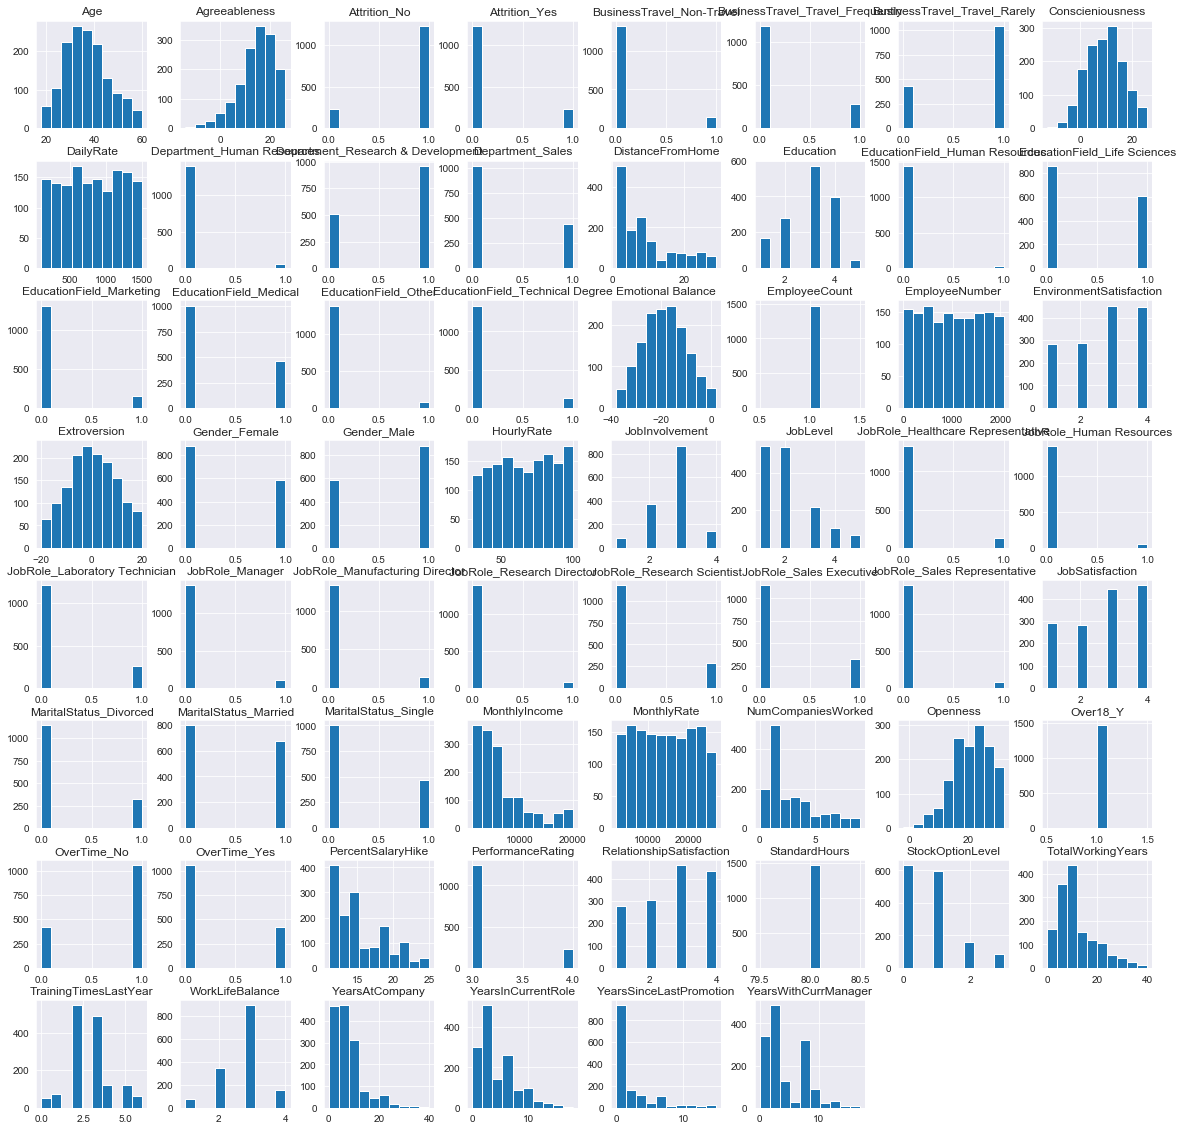

In [28]:
df_joined.hist(figsize=(20,20))

In [29]:
# features = ['Age', 'Attrition', 'Openness', 'Conscieniousness',
#        'Extroversion', 'Agreeableness', 'Emotional Balance', 'BusinessTravel',
#        'DailyRate', 'Department', 'DistanceFromHome', 'Education',
#        'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
#        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
#        'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
#        'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
#        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager']

More data cleaning

In [30]:
# Dropping needless columns:
to_delete = ['Attrition_No', 'Gender_Male', 'OverTime_No']
df_joined =  df_joined.drop(['Attrition_No', 'Gender_Male', 'OverTime_No'], axis = 1)



In [31]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',


In [32]:
feature_1 = ['Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes','Gender_Female', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y', 'OverTime_Yes']
# 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 
# 'Department_Human Resources', 'Department_Research & Development','Department_Sales',
# 'EducationField_Human Resources','EducationField_Life Sciences', 'EducationField_Marketing',
# 'EducationField_Medical', 'EducationField_Other',  'EducationField_Technical Degree',
# 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
# 'JobRole_Manufacturing Director', 'JobRole_Research Director','JobRole_Research Scientist', 
# 'JobRole_Sales Executive', 'JobRole_Sales Representative',

In [33]:
correlation = df_joined[feature_1].corr()
correlation

,Age,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Female,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_Yes
Age,1.000000,-0.023743,0.040741,-0.013341,0.062003,0.020120,0.010661,-0.001686,0.208034,0.010146,...,0.212901,0.216513,0.202089,-0.159205,0.036311,0.033120,0.083919,-0.119185,NaN,0.028062
Openness,-0.023743,1.000000,0.096079,0.162440,0.149655,0.106230,-0.002112,0.014149,-0.073878,-0.022128,...,-0.003563,-0.005672,-0.026941,0.000754,-0.010129,-0.034992,0.027308,0.002032,NaN,0.000105
Conscieniousness,0.040741,0.096079,1.000000,0.117768,0.134669,0.271948,-0.028912,0.000658,-0.008756,-0.006591,...,0.016208,0.000922,0.025891,0.011847,0.001547,0.030552,-0.044952,0.020776,NaN,0.005422
Extroversion,-0.013341,0.162440,0.117768,1.000000,0.381930,0.305301,-0.020790,0.006561,-0.028962,-0.012078,...,-0.051414,-0.063465,-0.059733,0.013568,-0.007609,-0.025806,0.017836,0.003959,NaN,-0.024900
Agreeableness,0.062003,0.149655,0.134669,0.381930,1.000000,0.122581,-0.014651,0.021290,0.044283,0.013246,...,-0.009202,-0.005315,-0.028817,0.019284,-0.018172,-0.013719,0.035019,-0.025176,NaN,-0.021929
Emotional Balance,0.020120,0.106230,0.271948,0.305301,0.122581,1.000000,-0.042872,-0.010479,-0.004079,-0.058458,...,-0.011185,-0.008240,-0.018687,0.033660,0.009371,-0.003748,-0.006477,0.010262,NaN,-0.029179
DailyRate,0.010661,-0.002112,-0.028912,-0.020790,-0.014651,-0.042872,1.000000,-0.004985,-0.016806,0.018355,...,0.009932,-0.033229,-0.026363,-0.056652,0.011716,0.037080,0.040035,-0.075835,NaN,0.009135
DistanceFromHome,-0.001686,0.014149,0.000658,0.006561,0.021290,-0.010479,-0.004985,1.000000,0.021042,-0.016075,...,0.018845,0.010029,0.014406,0.077924,0.001851,-0.005440,0.030232,-0.027445,NaN,0.025514
Education,0.208034,-0.073878,-0.008756,-0.028962,0.044283,-0.004079,-0.016806,0.021042,1.000000,-0.027128,...,0.060236,0.054254,0.069065,-0.031373,0.016547,-0.002439,-0.001865,0.004168,NaN,-0.020322
EnvironmentSatisfaction,0.010146,-0.022128,-0.006591,-0.012078,0.013246,-0.058458,0.018355,-0.016075,-0.027128,1.000000,...,0.018007,0.016194,-0.004999,-0.103369,-0.000508,0.016439,-0.022180,0.009035,NaN,0.070132


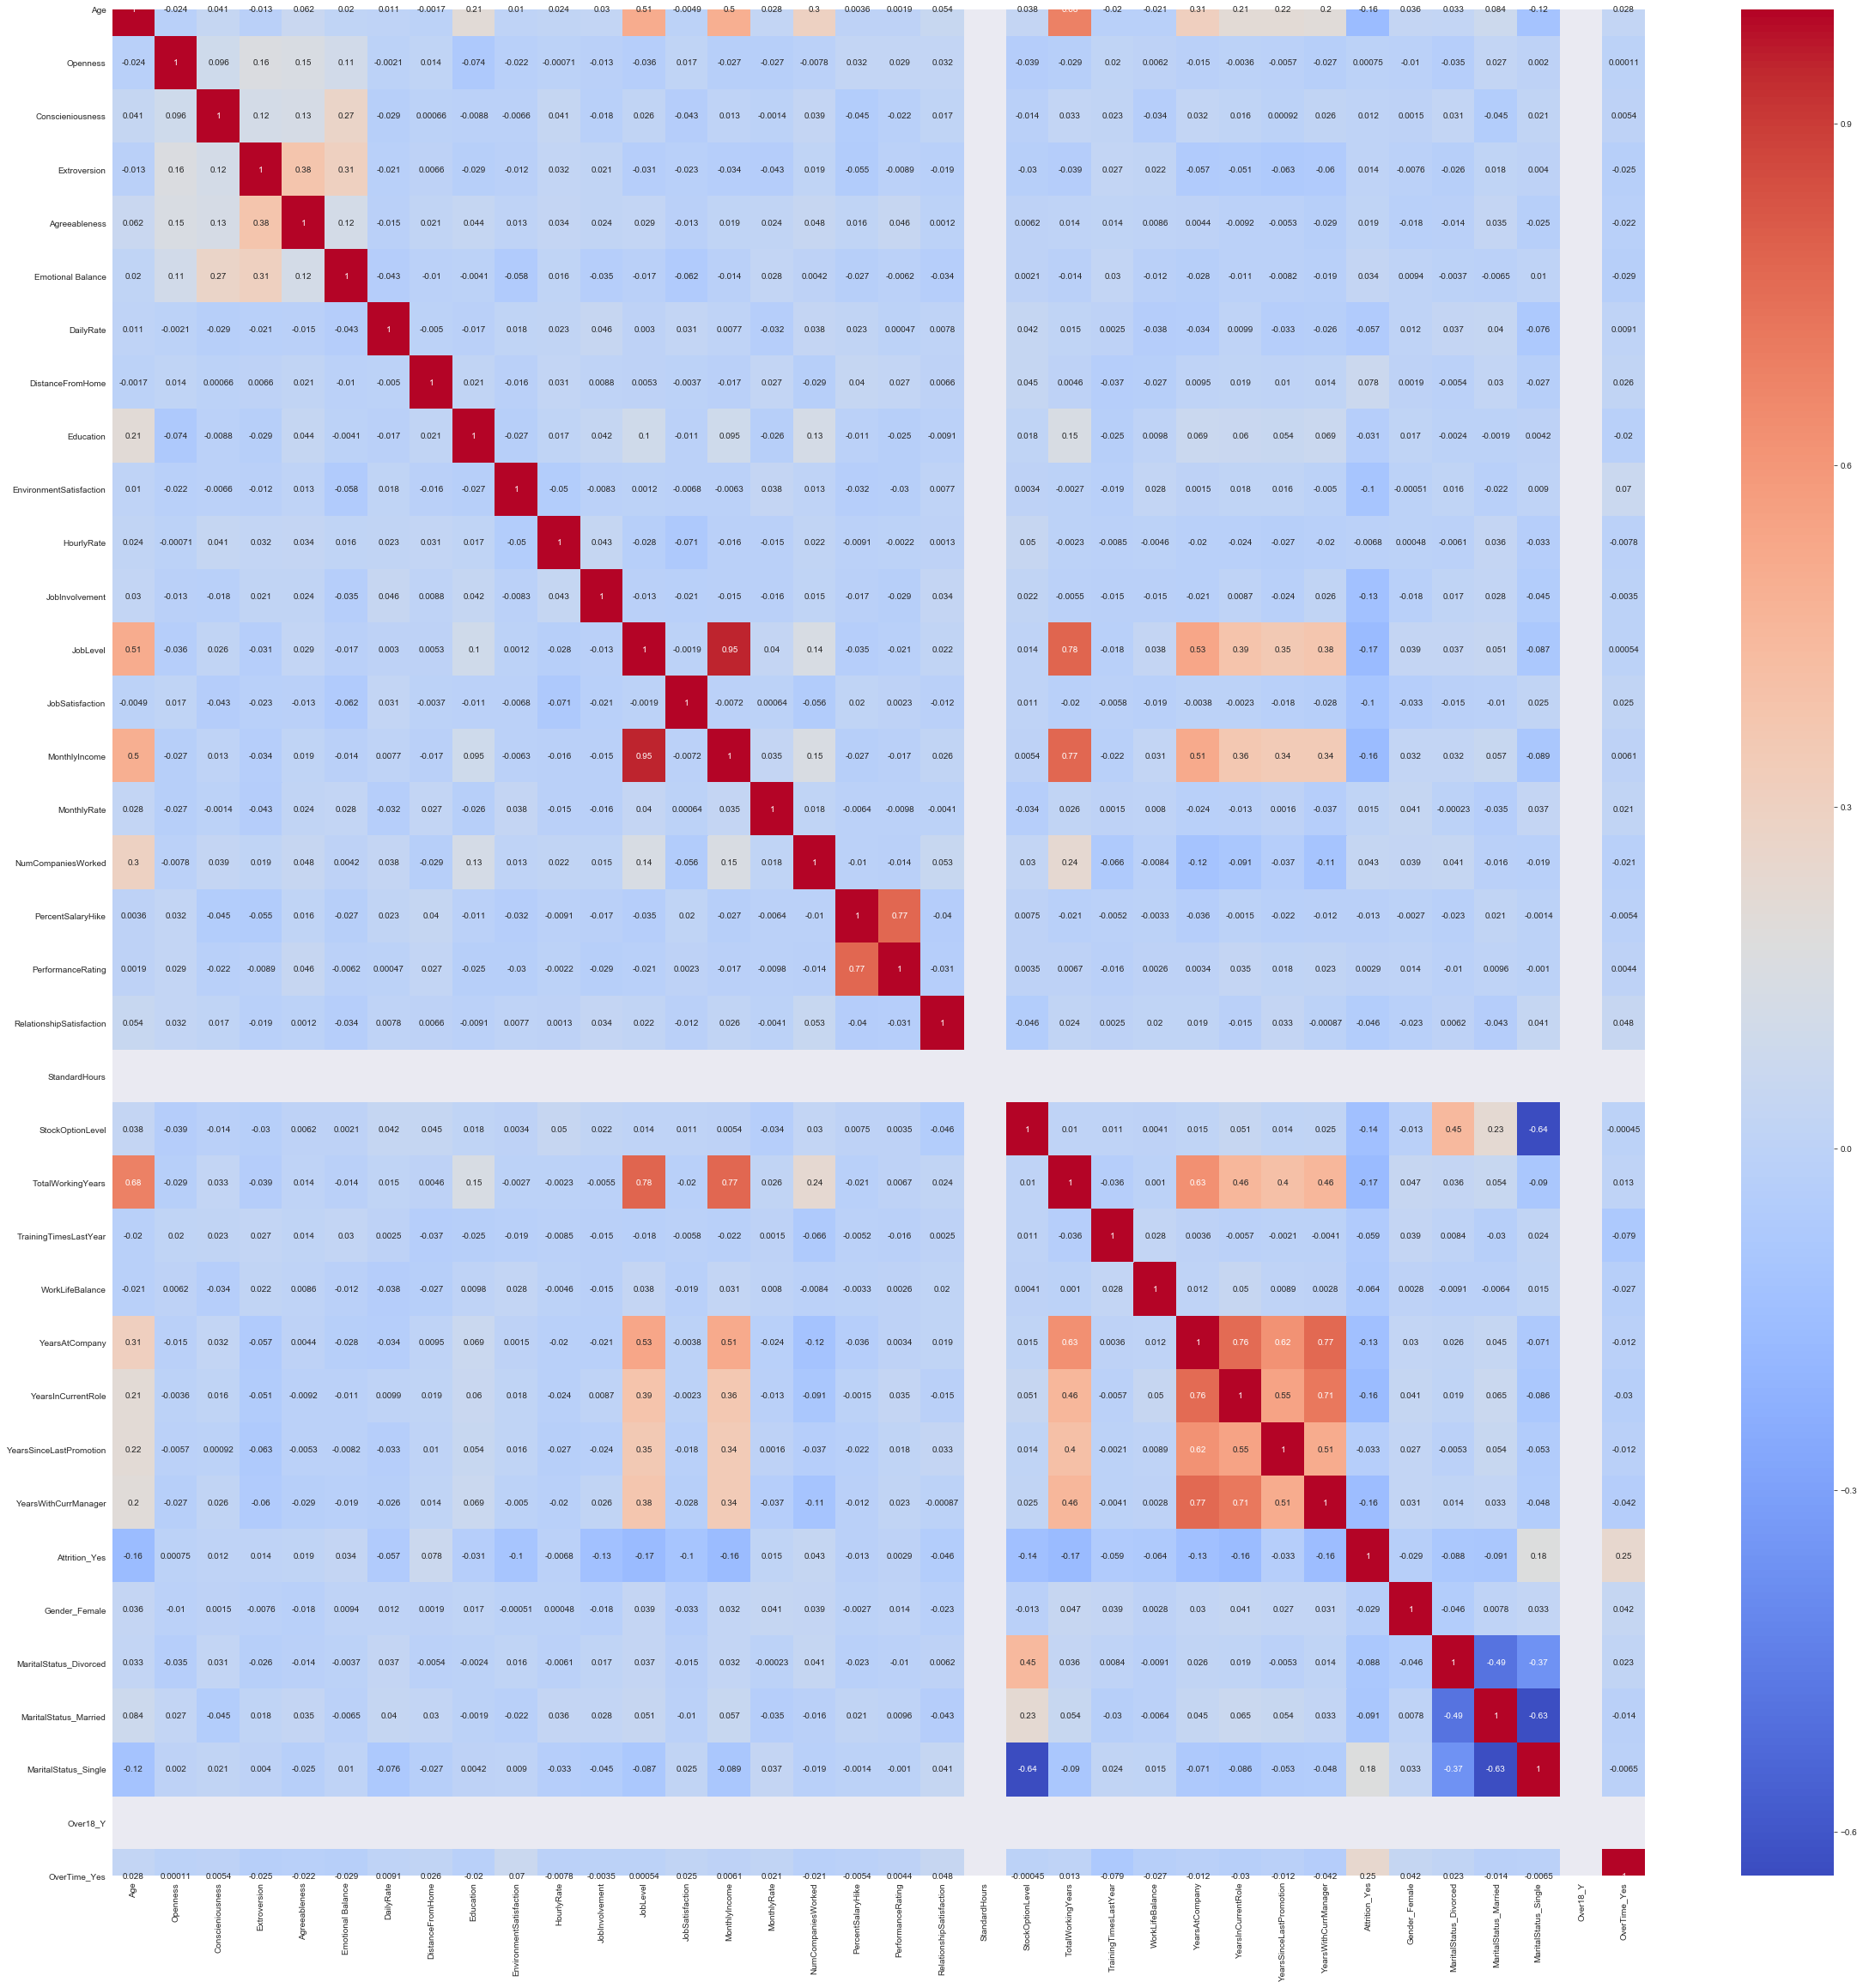

In [34]:
plt.figure(figsize= (40, 40))
sns.heatmap(correlation, annot= True, cmap = "coolwarm", linecolor= "white")

In [35]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',


### Pairwise Features 

### Attrition by Gender:

In [36]:
import plotly.express as px

fig = px.bar(df_joined, x= 'Gender_Female', y= 'Attrition_Yes', color= 'Gender_Female')
fig.show()

### Employee Count by Gender:

In [37]:

fig = px.histogram(df_joined, x="Gender_Female", color = 'Gender_Female')
fig.show()

### Job Satisfaction by Gender:

In [38]:
fig = px.pie(df_joined, values='JobSatisfaction', names='Gender_Female', title='Job Satisfaction')
fig.show()

In [39]:
satisfaction_gender = pd.DataFrame(df_joined.groupby(['Gender_Female'])['JobSatisfaction'].mean())
satisfaction_gender = satisfaction_gender.reset_index()
satisfaction_gender

,Gender_Female,JobSatisfaction
0,0,2.758503
1,1,2.683673


### Attrition by Distance from Home:

In [40]:

fig = px.bar(df_joined, x= 'DistanceFromHome', y= 'Attrition_Yes', color= 'DistanceFromHome')
fig.show()

In [41]:
fig = px.histogram(df_joined, x="DistanceFromHome", color = 'DistanceFromHome')
fig.show()

In [42]:
import plotly.figure_factory as ff

In [43]:
# x = np.random.randn(1000)
hist_data = [df_joined['DistanceFromHome']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

I don't need raw counts of attrtion by distance from home;  what I wanted was mean distance:

In [44]:
distance_by_mean_attrition = pd.DataFrame(df_joined.groupby(['Attrition_Yes'])['DistanceFromHome'].mean())
distance_by_mean_attrition

,DistanceFromHome
Attrition_Yes,
0,8.915653
1,10.632911


In [45]:
# I had to reset index becasue I wanted to plot attrition as a value, not use it as an index.
distance_by_mean_attrition = distance_by_mean_attrition.reset_index()
distance_by_mean_attrition

,Attrition_Yes,DistanceFromHome
0,0,8.915653
1,1,10.632911


In [46]:
fig = px.bar(distance_by_mean_attrition, x= 'Attrition_Yes', y = 'DistanceFromHome',  color = 'Attrition_Yes')
fig.show()

### Attrition by Performance Review:

In [47]:
distance_by_rating = pd.DataFrame(df_joined.groupby(['Attrition_Yes'])['PerformanceRating'].mean())
distance_by_rating

,PerformanceRating
Attrition_Yes,
0,3.153285
1,3.156118


In [48]:
distance_by_rating1 = pd.DataFrame(df_joined.groupby(['PerformanceRating'])['Attrition_Yes'].mean())
distance_by_rating1

,Attrition_Yes
PerformanceRating,
3,0.160772
4,0.163717


In [49]:
df_joined['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [50]:
df_joined['Attrition_Yes'].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [51]:
distance_by_rating = distance_by_rating.reset_index()
distance_by_rating

,Attrition_Yes,PerformanceRating
0,0,3.153285
1,1,3.156118


In [52]:
fig = px.bar(distance_by_rating, x= 'Attrition_Yes', y = 'PerformanceRating',  color = 'Attrition_Yes')
fig.show()

In [53]:
# feature_1

In [54]:
# df_joined.to_csv('revised_df_joined.csv')

### Attrition by Job Satisfaction:

In [55]:
satisfaction_by_attrition = pd.DataFrame(df_joined.groupby(['Attrition_Yes'])['JobSatisfaction'].mean())

In [56]:
satisfaction_by_attrition = satisfaction_by_attrition.reset_index()

In [57]:
satisfaction_by_attrition

,Attrition_Yes,JobSatisfaction
0,0,2.778589
1,1,2.468354


In [58]:
fig = px.bar(satisfaction_by_attrition, x = 'Attrition_Yes', y = 'JobSatisfaction',  color = 'Attrition_Yes')
fig.show()

In [59]:
df_joined['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [60]:
df = pd.read_csv('data/employee_joined_psychometric.csv')
df.head()

,Unnamed: 0,EmployeeNumber,Age,Attrition,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,BusinessTravel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 41
0,0,1,41,Yes,25,23,14,22,1,Travel_Rarely,...,80,0,8,0,1,6,4,0,5,NaN
1,1,2,49,No,8,18,-8,11,-19,Travel_Frequently,...,80,1,10,3,3,10,7,1,7,NaN
2,2,4,37,Yes,27,25,5,14,-34,Travel_Rarely,...,80,0,7,3,3,0,0,0,0,NaN
3,3,5,33,No,23,2,-8,13,-31,Travel_Frequently,...,80,0,8,3,3,8,7,3,0,NaN
4,4,7,27,No,16,10,4,20,-18,Travel_Rarely,...,80,1,6,3,3,2,2,2,2,NaN


In [61]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',


In [62]:
fig = px.pie(df_joined, values='JobSatisfaction', names='Age', title='Job Satisfaction')
fig.show()

### Try above as scatter plot and barplot groupby age

In [79]:
satisfaction_by_age = df_joined.groupby('Age')['JobSatisfaction'].mean()

In [67]:
satisfaction = df_joined['JobSatisfaction'].mean
satisfaction

<bound method Series.mean of 0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64>

In [85]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

# x = np.random.randn(1000)
# hist_data = [x]
# group_labels = ['distplot'] # name of the dataset

# fig = ff.create_distplot(df_joined, group_labels)
# fig.show()

In [83]:
fig = px.bar(df_joined, x="Age", y="JobSatisfaction", color="Age", title="Job Satisfaction by Age")
fig.show()

In [64]:
df_joined.to_csv('df_joined_1.csv', index= False)

### Principle Complonent Analysis

In [ ]:
# # preprocess the data 
# from sklearn.preprocessing import StandardScaler
# # Separating out the features
# x = df.loc[:, features].values
# # Separating out the target
# y = df.loc[:,['mpg']].values

# # Standardizing the features
# x = StandardScaler().fit_transform(x)

In [ ]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5'])



In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_

In [ ]:
principalDf.iloc[:,:3].head()



In [ ]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

In [ ]:

# examine the first pricipal component
eig_vectors[0]

In [ ]:


# examine the components
pc1 = pca.components_[0]
pc2 = pca.components_[1]
# the .components attribute shows principal axes in feature space, representing the directions of maximum variance in the data. 
#The components are sorted by explained_variance_


In [ ]:

print(pc1)
print(pc2)

In [ ]:

# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

str_loading_1.sort_values(ascending=False)